# 🤖 SMOTE (Synthetic Minority Oversampling Technique)

---

### 📘 What is SMOTE?

**SMOTE** stands for **Synthetic Minority Oversampling Technique**.

It is used to **balance imbalanced datasets** by **creating synthetic samples** of the **minority class** instead of simply duplicating existing ones.

🧠 Unlike random oversampling (which duplicates data),  
SMOTE **interpolates** between existing minority class points to create **new, realistic** samples.

---

### 💡 Why SMOTE?

When your dataset is imbalanced, the model tends to:
- Focus too much on the **majority class**
- Misclassify **minority samples**
- Achieve misleadingly high **accuracy** but poor **recall** or **F1-score**

SMOTE helps by:
✅ Increasing minority class size  
✅ Maintaining class diversity  
✅ Preventing overfitting caused by simple duplication

---

### 🧩 How SMOTE Works — Step-by-Step

1️⃣ For each minority sample $x_i$:
   - Find its **k nearest neighbors** within the minority class (usually $k = 5$).

2️⃣ Randomly select one of those neighbors $x_j$.

3️⃣ Create a **synthetic sample** along the line between $x_i$ and $x_j$ using:

$$
x_{\text{new}} = x_i + \lambda \times (x_j - x_i)
$$

where $\lambda \in [0, 1]$ is a random number.

4️⃣ Repeat until the minority class reaches the desired size.

---

### 🔬 Intuition

Instead of **copying** existing points, SMOTE **creates new points between them** —  
this makes the decision boundary smoother and more generalizable.

📊 Example (2D space):

- Minority samples are scattered sparsely.  
- SMOTE adds synthetic samples **between** nearby points.  
→ The minority region becomes denser and more continuous.

---

### ⚙️ Implementation Using `imblearn`

Let’s apply SMOTE to our previously created imbalanced dataset.

In [16]:
from sklearn.datasets import make_classification

## ⚙️ What is `make_classification`?

`make_classification` is a **data generation utility** from the **scikit-learn** library.  
It is used to create **synthetic (artificial) classification datasets** for testing and experimenting with ML algorithms.

---

### 🧠 Why do we use it?

When you’re learning concepts like:
- **Imbalanced data handling** (SMOTE, upsampling, downsampling),
- **Classification algorithms** (Logistic Regression, SVM, etc.),
- **Feature selection** and **EDA**,  

you often don’t have a real dataset readily available — or you may just want to test quickly.  
That’s where `make_classification` helps:  
it **generates a clean, controlled dataset** that mimics real-world classification problems.

---

### 📦 From where?

`make_classification` is available inside:

```python
from sklearn.datasets import make_classification
```

In [17]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## ⚙️ Understanding the `make_classification()` Function Signature

This is the full function call:

```python
make_classification(
    n_samples=100,
    n_features=20,
    *,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=None,
    return_X_y=True,
)
```
---
### 🔹 Basic Parameters

| Parameter | Meaning | Example |
|------------|----------|----------|
| **n_samples** | Total number of data points (rows) to generate. | `100` → means 100 total records |
| **n_features** | Total number of features (columns) for each sample. | `20` → each sample has 20 features (like columns in a dataset) |

---

### 🔹 Feature Types

`make_classification` lets you decide how many features are useful or just noise:

| Parameter | Meaning | Example |
|------------|----------|----------|
| **n_informative** | Features that actually help predict the class (true signal). | `2` → only 2 columns affect the label |
| **n_redundant** | Features that are **combinations** (linear copies) of the informative ones. | `2` → 2 columns depend on the informative features |
| **n_repeated** | Features that are just **duplicates** of other features. | `0` → no duplicate columns |

🧠 **In short:**  
Out of 20 features → 2 are informative, 2 are redundant, and the rest (16) are random noise.

---

### 🔹 Class Configuration

| Parameter | Meaning | Example |
|------------|----------|----------|
| **n_classes** | Number of target classes. | `2` → binary classification (0 and 1) |
| **n_clusters_per_class** | Number of clusters (groups) to form within each class. | `2` → each class will have 2 sub-groups of points |

📊 **Example:**  
If `n_classes=2` and `n_clusters_per_class=2`,  
you’ll see 4 visible blobs on a scatter plot (2 per class).

---

### 🔹 Class Distribution and Noise

| Parameter | Meaning | Example |
|------------|----------|----------|
| **weights** | Controls how imbalanced the dataset is. | `[0.9, 0.1]` → 90% class 0, 10% class 1 |
| **flip_y** | Randomly flips a small % of class labels to add noise. | `0.01` → 1% of samples get wrong labels |

✅ `flip_y` helps make the dataset a bit more realistic, like having mislabeled data in real life.

---

### 🔹 Data Spread and Shape

| Parameter | Meaning | Example |
|------------|----------|----------|
| **class_sep** | Controls how far apart the class clusters are. | Higher value → classes are easier to separate |
| **hypercube** | If `True`, samples are spread in a cube shape; else in a random cluster. | Usually keep it `True` |
| **shift** | Shifts all features by a constant value. | `0.0` → no shift |
| **scale** | Scales (multiplies) all feature values by this factor. | `1.0` → keep as is |

💡 For example, if `shift=2`, all feature values increase by 2.  
If `scale=0.5`, all feature values are halved.

---

### 🔹 Data Randomization and Return Format

| Parameter | Meaning | Example |
|------------|----------|----------|
| **shuffle** | Whether to shuffle the rows after generating the data. | `True` → rows are mixed randomly |
| **random_state** | Fixes the random seed so you get the same data every run. | `42` → ensures reproducibility |
| **return_X_y** | Whether to return data as `(X, y)` instead of a dictionary. | `True` → gives two arrays: features `X`, labels `y` |

---

### ✅ Summary

> “Create 100 samples, each with 20 features.  
> Only 2 features truly determine the class, 2 others are linear combinations, and the rest are random noise.  
> Generate 2 classes (0 and 1), each forming 2 clusters.  
> Randomly flip 1% of labels to add noise.  
> Keep the classes moderately separated, shuffle data, and return `(X, y)`.”

---

### 📦 Output

`make_classification()` returns:

```python
X, y = make_classification(...)
```

- X → A NumPy array of shape (n_samples, n_features) — the features
- y → A NumPy array of shape (n_samples,) — the target labels (0 or 1)

✅ In short:
> `make_classification()` lets you generate your own custom dataset —<br>
> with full control over features, noise, imbalance, and randomness —<br>
> so you can practice data preprocessing and model building with realistic, synthetic data.

In [23]:
# --------------------------------------------------------------
# 🧮 Step 1: Generate a Synthetic Imbalanced Dataset
# --------------------------------------------------------------

# 🎲 Generate 2D classification data using sklearn's make_classification
# ---------------------------------------------------------------------
# n_samples         → total number of data points (1000)
# n_features        → total number of features (2, for easy visualization)
# n_clusters_per_class → one cluster (group) per class
# weights           → defines class imbalance; [0.90] means 90% class 0, 10% class 1
# random_state      → ensures reproducibility (same random data each run)
# n_redundant       → no redundant (duplicate) features
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_clusters_per_class=1,
    weights=[0.90],
    random_state=12,
    n_redundant=0
)

# --------------------------------------------------------------
# 🧩 Step 2: Convert NumPy arrays into a clean Pandas DataFrame
# --------------------------------------------------------------

# 🔹 Create a DataFrame for features
df_1 = pd.DataFrame(X, columns=['f1', 'f2'])

# 🔹 Create a DataFrame for target labels
df_2 = pd.DataFrame(y, columns=['target'])

# 🔹 Combine feature and target DataFrames side-by-side
# axis=1 → horizontal concatenation (adds target as a new column)
final_df = pd.concat([df_1, df_2], axis=1)

# 👀 Display first few rows to inspect data
final_df.head()


,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [24]:
# --------------------------------------------------------------
# 🧾 Step 3: Check the class balance
# --------------------------------------------------------------

# Count how many samples belong to each class (0 and 1)
final_df.target.value_counts()


target
0    900
1    100
Name: count, dtype: int64

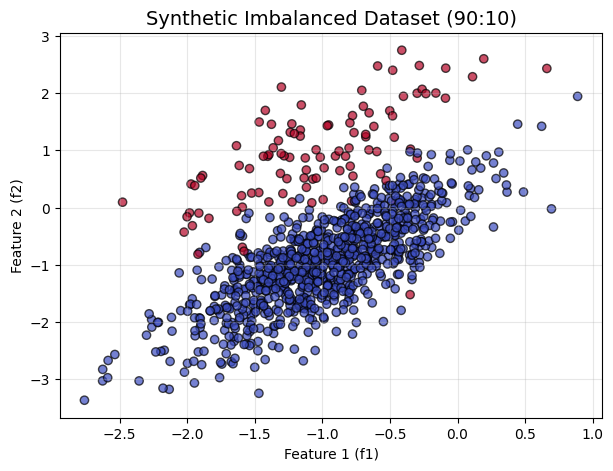

In [25]:
# --------------------------------------------------------------
# 🎨 Step 4: Visualize the Dataset in 2D
# --------------------------------------------------------------

plt.figure(figsize=(7,5))

# Scatter plot of feature_1 vs feature_2
# c=final_df['target'] → colors each point by class (0 or 1)
plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'], cmap='coolwarm', edgecolors='k', alpha=0.7)

plt.title("Synthetic Imbalanced Dataset (90:10)", fontsize=14)
plt.xlabel("Feature 1 (f1)")
plt.ylabel("Feature 2 (f2)")
plt.grid(alpha=0.3)
plt.show()


| Step | What It Does                                  | Key Takeaway                             |
| ---- | --------------------------------------------- | ---------------------------------------- |
| 1️⃣  | Generate dataset with `make_classification()` | Creates a 2D imbalanced binary dataset   |
| 2️⃣  | Convert NumPy arrays to DataFrame             | Easy for analysis and plotting           |
| 3️⃣  | Check class distribution                      | Confirms imbalance (90:10 ratio)         |
| 4️⃣  | Plot scatter chart                            | Visualize class separation and imbalance |


In [ ]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [imblearn]


In [26]:
from imblearn.over_sampling import SMOTE

In [39]:
# --------------------------------------------------------------
# 🤖 Step 1: Apply SMOTE (Synthetic Minority Oversampling Technique)
# --------------------------------------------------------------

# ⚙️ Initialize the SMOTE object
# SMOTE will create synthetic samples for the minority class (target=1)
oversample = SMOTE(random_state=42)

# 🧩 Apply SMOTE to balance the dataset
# --------------------------------------------------------------
# final_df[['f1', 'f2']] → input features (X)
# final_df['target']     → output labels (y)
# SMOTE will return new X and y where both classes have equal samples
X, y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

# --------------------------------------------------------------
# 🧾 Step 2: Check shapes and counts
# --------------------------------------------------------------

# X.shape → new feature matrix size after SMOTE
# y.shape → new target vector size after SMOTE
print("Feature matrix shape:", X.shape)
print("Target vector shape :", y.shape)

# Count how many samples belong to each class after oversampling
print("\nClass 0 count:", len(y[y == 0]))
print("Class 1 count:", len(y[y == 1]))


Feature matrix shape: (1800, 2)
Target vector shape : (1800,)

Class 0 count: 900
Class 1 count: 900


In [ ]:
# --------------------------------------------------------------
# 🧱 Step 3: Convert the Resampled Arrays Back into a DataFrame
# --------------------------------------------------------------

# 🔹 Create a DataFrame for the oversampled features
df_1 = pd.DataFrame(X, columns=['f1', 'f2'])

# 🔹 Create a DataFrame for the new target labels
df_2 = pd.DataFrame(y, columns=['target'])

# 🔹 Combine both to get the final oversampled dataset
# axis=1 → add target as a new column
oversample_df = pd.concat([df_1, df_2], axis=1)

# Check the new class balance
oversample_df.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

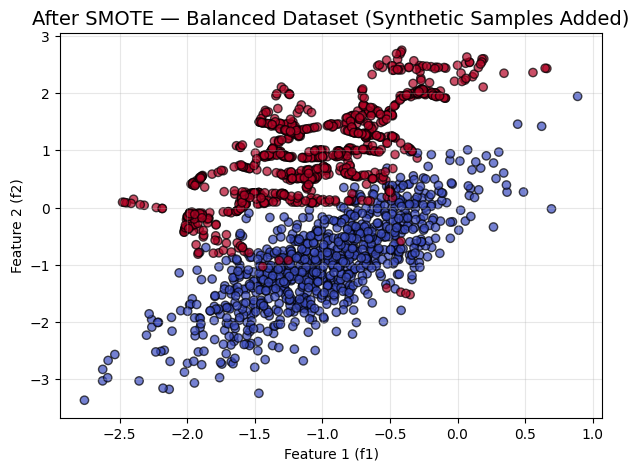

In [41]:
# --------------------------------------------------------------
# 📊 Step 4: Visualize the Balanced Dataset
# --------------------------------------------------------------

plt.figure(figsize=(7,5))

# Scatter plot of f1 vs f2
# c=oversample_df['target'] → color points based on target class (0 or 1)
plt.scatter(
    oversample_df['f1'],
    oversample_df['f2'],
    c=oversample_df['target'],
    cmap='coolwarm',
    edgecolors='k',
    alpha=0.7
)

plt.title("After SMOTE — Balanced Dataset (Synthetic Samples Added)", fontsize=14)
plt.xlabel("Feature 1 (f1)")
plt.ylabel("Feature 2 (f2)")
plt.grid(alpha=0.3)
plt.show()


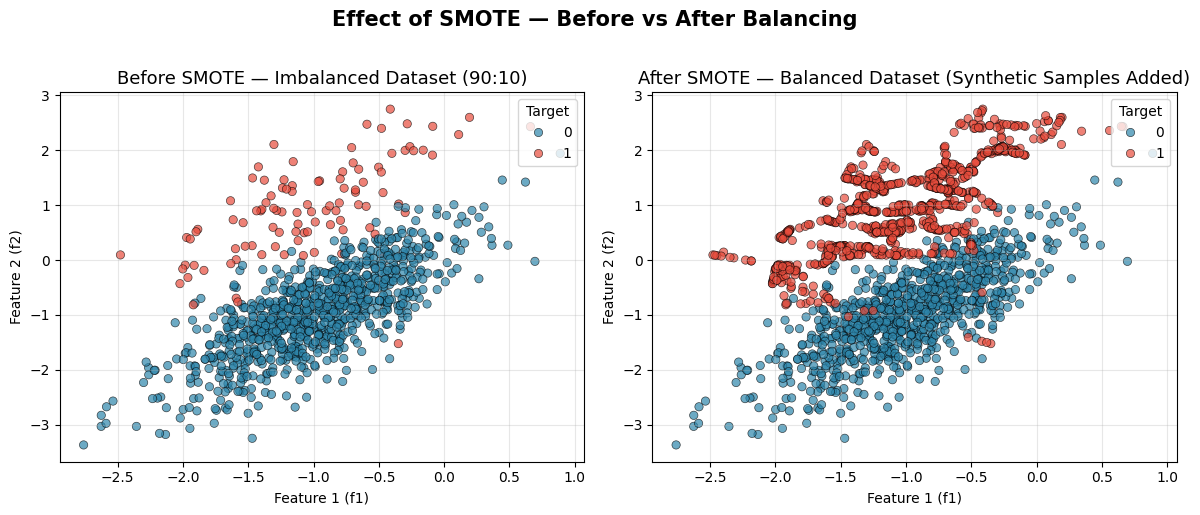

In [42]:
# --------------------------------------------------------------
# 📊 Step 5: Visualize "Before vs After SMOTE" using Subplots
# --------------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# --------------------------------------------------------------
# 🔹 Subplot 1 → Before SMOTE (Imbalanced Dataset)
# --------------------------------------------------------------
plt.subplot(1, 2, 1)  # (rows, columns, position)
sns.scatterplot(
    x='f1',
    y='f2',
    hue='target',
    data=final_df,
    palette=['#2E86AB', '#E74C3C'],
    edgecolor='k',
    alpha=0.7
)
plt.title("Before SMOTE — Imbalanced Dataset (90:10)", fontsize=13)
plt.xlabel("Feature 1 (f1)")
plt.ylabel("Feature 2 (f2)")
plt.legend(title='Target', loc='upper right')
plt.grid(alpha=0.3)

# --------------------------------------------------------------
# 🔹 Subplot 2 → After SMOTE (Balanced Dataset)
# --------------------------------------------------------------
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='f1',
    y='f2',
    hue='target',
    data=oversample_df,
    palette=['#2E86AB', '#E74C3C'],
    edgecolor='k',
    alpha=0.7
)
plt.title("After SMOTE — Balanced Dataset (Synthetic Samples Added)", fontsize=13)
plt.xlabel("Feature 1 (f1)")
plt.ylabel("Feature 2 (f2)")
plt.legend(title='Target', loc='upper right')
plt.grid(alpha=0.3)

# --------------------------------------------------------------
# 🎨 Adjust layout and display
# --------------------------------------------------------------
plt.suptitle("Effect of SMOTE — Before vs After Balancing", fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 📊 Before vs After SMOTE — Visual Comparison

This side-by-side chart clearly shows **how SMOTE transforms an imbalanced dataset** into a balanced one.

---

### 🔹 Left Chart — *Before SMOTE*
- The dataset is **highly imbalanced**:  
  - Class **0 (blue)** dominates (90% of total samples).  
  - Class **1 (red)** has very few samples (only 10%).  
- Because of this imbalance:
  - The model may **ignore** the minority class.
  - Decision boundaries are **biased** toward the majority.
  - Minority samples (red) are scattered and isolated — hard for the model to learn their pattern.

---

### 🔹 Right Chart — *After SMOTE*
- SMOTE has **generated synthetic samples** for the minority class.
- These new red points appear **between existing minority samples**, not random duplicates.
- The result:
  - Both classes now have **equal number of samples**.
  - The minority region becomes **denser and smoother**.
  - The model can now learn **balanced decision boundaries**.

---

### 💡 Key Takeaway

| Step | Dataset | Class Ratio | Behavior |
|------|----------|--------------|-----------|
| 🧮 Before SMOTE | Original | 90 : 10 | Biased toward majority class |
| ⚙️ After SMOTE | Synthetic Balanced | 50 : 50 | Fair learning across both classes |

✅ **In short:**  
> SMOTE fills the empty space between minority samples →  
> creating a more uniform, balanced dataset →  
> resulting in a **fairer and more accurate ML model.**


### ✅ Explanation

| Panel                        | Description                                                              |
| ---------------------------- | ------------------------------------------------------------------------ |
| **Left Plot (Before SMOTE)** | You can see Class 0 (blue) dominates → Class 1 (red) has very few points |
| **Right Plot (After SMOTE)** | SMOTE has generated *synthetic* red points → dataset now evenly balanced |

### 🧩 Visual Summary

| Concept      | Visualization                                            |
| ------------ | -------------------------------------------------------- |
| Before SMOTE | Sparse minority (red) samples far fewer than majority    |
| After SMOTE  | Minority samples (red) now balanced with majority (blue) |
